SVM Support Vertor Machine = Метод опорных векторов

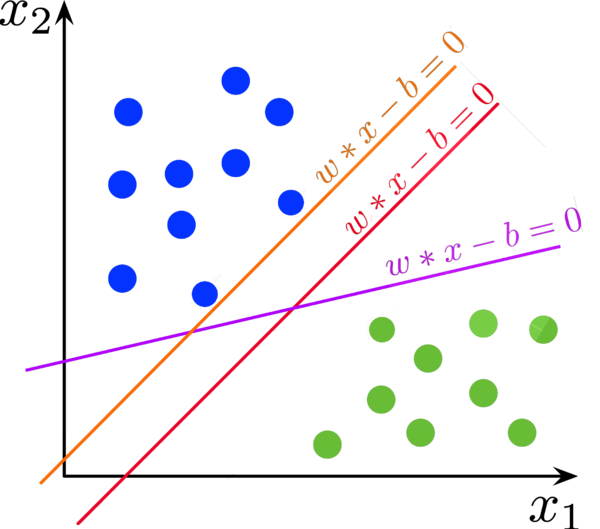



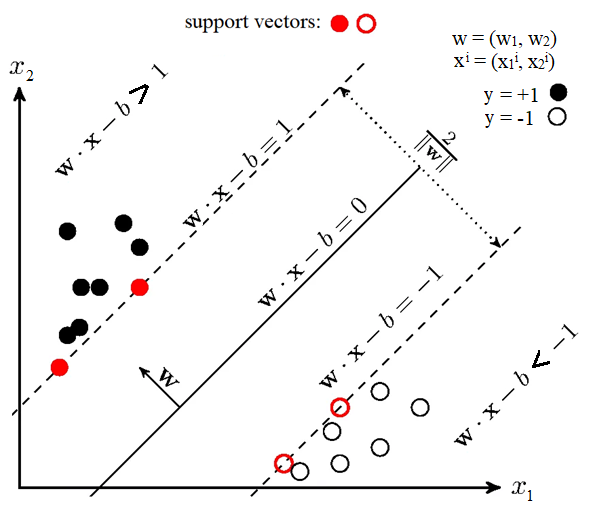

Разделяющая гиперплоскость: $w^Tx - b = 0$
    
При этом для класса "+1" $w^Tx - b > 0$, для класса "-1" $w^Tx - b < 0$


Ширина разделяющей полосы - проекция вектора $x_+  − x_-$ на нормаль к гиперплоскости $w$:

\begin{align} w^T(x_+  − x_-)/|w| = (w^Tx_+  − w^Tx_-)/|w| = \left((b + 1) - (b - 1)\right)/|w| = 2/|w| \rightarrow \max \end{align}

\begin{align} |w| \rightarrow \min \end{align}

\begin{align} w^Tw/2 \rightarrow \min \end{align}

Отступ $M = y(w^Tx - b)$, классификатор ошибается тогда и только тогда, когда $M<0$, объект находится на разделяющей полосе тогда и только тогда, когда $0 \le M<1$, классификатор верно классифицирует тогда и только тогда, когда $M \ge 1$

Метод опорных векторов с жестким зазором (запрещено попадание на разделяющую полосу):

\begin{aligned}  w^Tw/2 \rightarrow \min \\
y(w_Tx - b) \ge 1 \end{aligned}


Штраф за $M<0$:
\begin{aligned} Penalty = \sum_i{\max(0, 1 - M_i)} \end{aligned}

Функция потерь:
\begin{aligned} Q = \sum_i{\max(0, 1 - M_i)} + \lambda w^Tw/2 \end{aligned}

Пересчет весов:
\begin{aligned} \nabla Q &= \lambda w - yx,\space при yw_Tx  < 1 \\
\nabla Q &=  \lambda w,\space при yw_Tx \ge 1\end{aligned}


## ATTENTION!
с моаббовским датасетом, который нужен по заданию нужны приключения:
- python3.9.0
- **ОТДЕЛЬНЫЙ ЧИСТЫЙ ВЕНВ!!!**
- numpy = 1.20.0
- их файл трансформеров **(ЭТО НЕ ЛИБА С HUGGING FACE!!!)**

возможно, что-то еще, лично я дропнул идею идти с оригинальным датасетом на моменте преобразования в pytorch датасет.

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import moabb.datasets

In [ ]:
sampling_rate = 512

m_dataset = moabb.datasets.bi2013a(
    NonAdaptive=True,
    Adaptive=True,
    Training=True,
    Online=True,
)

bi2013a has been renamed to BI2013a. bi2013a will be removed in version 1.1.
The dataset class name 'bi2013a' must be an abbreviation of its code 'BrainInvaders2013a'. See moabb.datasets.base.is_abbrev for more information.


In [37]:
m_dataset.download()

In [38]:
m_data = m_dataset.get_data()

KeyboardInterrupt: 

In [ ]:
for _, sessions in sorted(m_data.items()):
  runs = sorted(list(sessions.items()))
  print(sorted(list(sessions.keys())))

['0', '1', '2', '3', '4', '5', '6', '7']
['0', '1', '2', '3', '4', '5', '6', '7']
['0', '1', '2', '3', '4', '5', '6', '7']
['0', '1', '2', '3', '4', '5', '6', '7']
['0', '1', '2', '3', '4', '5', '6', '7']
['0', '1', '2', '3', '4', '5', '6', '7']
['0', '1', '2', '3', '4', '5', '6', '7']
['0']
['0']
['0']
['0']
['0']
['0']
['0']
['0']
['0']
['0']
['0']
['0']
['0']
['0']
['0']
['0']
['0']


In [ ]:
print(m_data[1]['0']['0'])
channels = m_data[1]['0']['0'].ch_names[:-1]
channels

<RawArray | 17 x 159232 (311.0 s), ~20.7 MB, data loaded>


['Fp1',
 'Fp2',
 'F5',
 'AFz',
 'F6',
 'T7',
 'Cz',
 'T8',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'O1',
 'Oz',
 'O2']

In [ ]:
raw_dataset = []

for _, sessions in sorted(m_data.items()):
    eegs, markers = [], []
    for item, run in sorted(sessions['0'].items()):
        data = run.get_data()
        eegs.append(data[:-1])
        markers.append(data[-1])
    raw_dataset.append((eegs, markers))

In [ ]:
len(raw_dataset), len(raw_dataset[0]), len(raw_dataset[0][0]), raw_dataset[0][0][0].shape

(24, 2, 4, (16, 159232))

In [ ]:
del m_data, m_dataset

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from pathlib import Path
from importlib import reload

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import transformers

In [ ]:
decimation_factor = 10
final_rate = sampling_rate // decimation_factor
epoch_duration = 0.9 # seconds
labels_mapping = {33285.: 1, 33286.: 0}
captions = {0: 'empty', 1: 'target'}

eeg_pipe = make_pipeline(
    transformers.Decimator(decimation_factor),
    transformers.ButterFilter(sampling_rate // decimation_factor, 4, 0.5, 20),
    transformers.ChannellwiseScaler(StandardScaler()),
)
markers_pipe = transformers.MarkersTransformer(labels_mapping, decimation_factor)

In [ ]:
for eegs, _ in raw_dataset:
    eeg_pipe.fit(eegs)

AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.rcParams['figure.figsize'] = (8,6)
%matplotlib inline

In [ ]:
def add_intercept(a):
    a_extended = np.zeros((a.shape[0],a.shape[1]+1))
    a_extended[:,:-1] = a
    a_extended[:,-1] = int(1)  
    return a_extended

class SVMClassification(object):
    def __init__(self, learning_rate=0.01, lam=0.1, max_iter=200):
        self.max_iter = max_iter
        self.alpha = learning_rate
        self.lam = lam
        self.w = None
        self.history_w = []
        self.errors = None
        self.loss = None
        

    def fit(self, X, Y, verbose = False): 

        X = add_intercept(X)
        self.w = np.random.normal(loc=0, scale=0.05, size=X.shape[1])
        self.history_w.append(self.w)
        errors = []
        loss_epoch = []
        
        for epoch in range(self.max_iter): 
            err = 0
            loss = 0
            hinge_loss = 0
            for i, x in enumerate(X):
                margin = Y[i]*(self.w @ X[i])
                if margin >= 1: # классифицируем верно
                    self.w -= self.alpha*self.lam*self.w/self.max_iter
                    loss += self.soft_margin_loss(X[i],Y[i])
                    hinge_loss += self.hinge_loss(X[i], Y[i])
                else: # классифицируем неверно или попадаем на полосу разделения при 0<m<1
                    self.w += self.alpha*(Y[i]*X[i] - self.lam*self.w/self.max_iter)
                    err += 1
                    loss += self.soft_margin_loss(X[i],Y[i])
                    hinge_loss += self.hinge_loss(X[i], Y[i])
                self.history_w.append(self.w)
            if verbose:
                print('epoch {}. Errors={}. Mean Hinge_loss={}. Mean hinge loss={}'\
                      .format(epoch,err,loss,hinge_loss))
            errors.append(err)
            loss_epoch.append(loss)            
        self.history_w = np.array(self.history_w)    
        self.errors = np.array(errors)
        self.loss = np.array(loss_epoch)
        
    def predict(self, X:np.array) -> np.array:
        y_pred = []
        X_extended = add_intercept(X)
        for i in range(len(X_extended)):
            y_pred.append(np.sign(self.w @ X_extended[i]))
        return np.array(y_pred)         

    def hinge_loss(self, x, y):
        return max(0,1 - y*(x @ self.w))

    def soft_margin_loss(self, x, y):
        return self.hinge_loss(x, y) + (self.lam*(self.w.T @ self.w) / 2)

Провести скоринг клиентов банка из набора данных German Credit Cards.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('./German_Credit_Cards_UCI.csv')
df.head()

,Customer ID,Checking Account Status,Loan Duration (Months),Credit History,Purpose,Loan Amount,Savings Account Balance,Present Employment Time (Years),Installment Rate in Percentage of Disposable Income,Personal Status and Gender,...,Property,Age (Years),Other Credits,Home Ownership,Number of Existing Credits at This Bank,Job Category,Number of Dependents,Telephone,Foreign Worker Status,Loan Status
0,1122334,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,...,real estate,67,none,own,2,skilled,1,yes,yes,fully paid
1,6156361,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,...,real estate,22,none,own,1,skilled,1,none,yes,charged off
2,2051359,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,fully paid
3,8740590,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,...,building society savings/life insurance,45,none,for free,1,skilled,2,none,yes,fully paid
4,3924540,< 0 DM,24,past payment delays,car (new),4870,< 100 DM,1 - 4 years,3,male-single,...,unknown-none,53,none,for free,2,skilled,2,none,yes,charged off


In [ ]:
df['Loan Status'].unique()

array(['fully paid', 'charged off'], dtype=object)

In [ ]:
X = df.drop(columns=['Loan Status', 'Customer ID'])

In [ ]:
Y = df['Loan Status']

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X = poly.fit_transform(X)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
Y = Y.apply(lambda x: 1 if x == 'fully paid' else -1).values

In [ ]:
X

array([[ 0.        , -1.2346825 , -0.74595203, ...,  1.21126103,
         1.22373892,  0.19731808],
       [ 0.        ,  2.24392681,  0.94702022, ..., -0.82558588,
        -0.81716777,  0.19731808],
       [ 0.        , -0.73773831, -0.41776607, ..., -0.82558588,
        -0.81716777,  0.19731808],
       ...,
       [ 0.        ,  1.99545472,  0.46022874, ..., -0.82558588,
        -0.81716777,  0.19731808],
       [ 0.        ,  2.24392681,  1.54108283, ..., -0.82558588,
        -0.81716777,  0.19731808],
       [ 0.        ,  2.24392681,  2.36632715, ...,  1.21126103,
         1.22373892,  0.19731808]])

In [ ]:
Y

array([ 1, -1,  1, ...,  1,  1, -1], dtype=int64)

In [ ]:
svm = SVMClassification(learning_rate=0.1, lam=0.01, max_iter=200)
svm.fit(X, Y, verbose = True)

print(svm.errors)
print(svm.w) 

epoch 0. Errors=388. Mean Hinge_loss=5450.933845032347. Mean hinge loss=457.17406366103614
epoch 1. Errors=275. Mean Hinge_loss=11011.950243095456. Mean hinge loss=138.98837469625738
epoch 2. Errors=222. Mean Hinge_loss=16397.011020642694. Mean hinge loss=163.73938555116248
epoch 3. Errors=212. Mean Hinge_loss=21101.68787716284. Mean hinge loss=116.74721114780017
epoch 4. Errors=176. Mean Hinge_loss=24563.732122961377. Mean hinge loss=149.49269147714153
epoch 5. Errors=172. Mean Hinge_loss=28076.720821681152. Mean hinge loss=134.2715914889154
epoch 6. Errors=155. Mean Hinge_loss=31142.055237768935. Mean hinge loss=92.41918958716347
epoch 7. Errors=145. Mean Hinge_loss=33772.790759803334. Mean hinge loss=153.6475812982764
epoch 8. Errors=148. Mean Hinge_loss=36558.080614316474. Mean hinge loss=56.267944921680176
epoch 9. Errors=114. Mean Hinge_loss=39148.405216551655. Mean hinge loss=65.31629081494351
epoch 10. Errors=120. Mean Hinge_loss=41194.950461360735. Mean hinge loss=103.20958818

epoch 98. Errors=38. Mean Hinge_loss=92539.98268870673. Mean hinge loss=0
epoch 99. Errors=36. Mean Hinge_loss=92540.37272930382. Mean hinge loss=0
epoch 100. Errors=34. Mean Hinge_loss=92714.44554073217. Mean hinge loss=0
epoch 101. Errors=30. Mean Hinge_loss=93078.21369222326. Mean hinge loss=0
epoch 102. Errors=46. Mean Hinge_loss=93120.20882505023. Mean hinge loss=0
epoch 103. Errors=44. Mean Hinge_loss=93469.24010703956. Mean hinge loss=0
epoch 104. Errors=48. Mean Hinge_loss=93992.71235345709. Mean hinge loss=0
epoch 105. Errors=33. Mean Hinge_loss=94205.76190777445. Mean hinge loss=0
epoch 106. Errors=35. Mean Hinge_loss=94073.30489745845. Mean hinge loss=0
epoch 107. Errors=20. Mean Hinge_loss=94065.94194098846. Mean hinge loss=0
epoch 108. Errors=33. Mean Hinge_loss=93883.52396007377. Mean hinge loss=0
epoch 109. Errors=34. Mean Hinge_loss=93715.5944703306. Mean hinge loss=0
epoch 110. Errors=30. Mean Hinge_loss=93676.14378754252. Mean hinge loss=0
epoch 111. Errors=29. Mean H

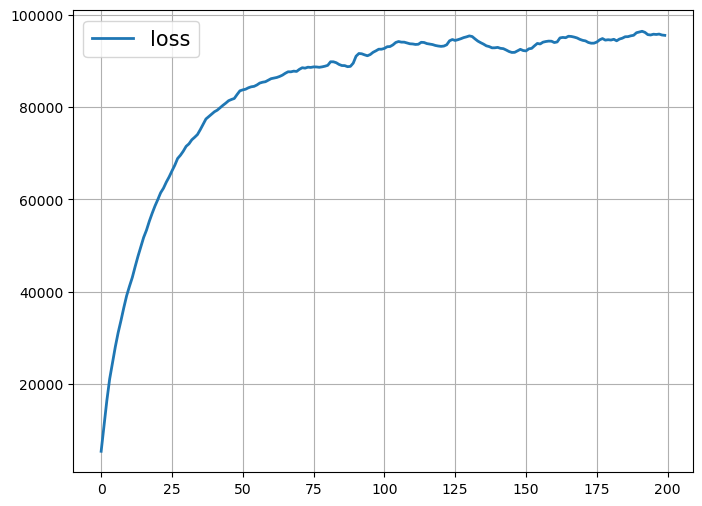

In [ ]:
plt.plot(svm.loss, linewidth=2, label='loss')
plt.grid()
plt.legend(prop={'size': 15})
plt.show()

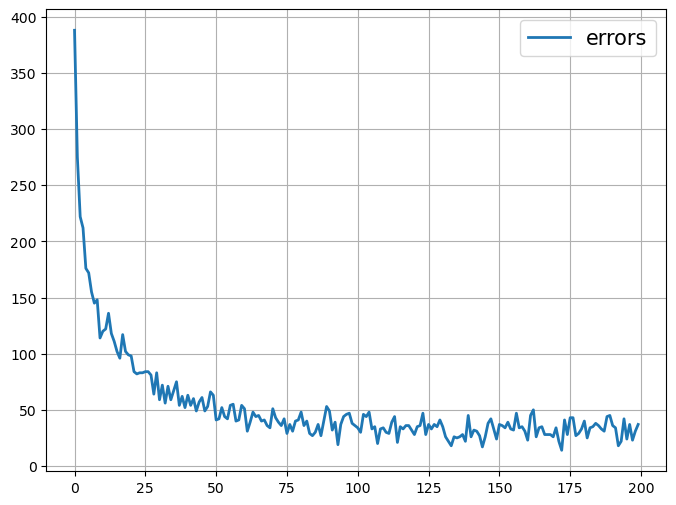

In [ ]:
plt.plot(svm.errors, linewidth=2, label='errors')
plt.grid()
plt.legend(prop={'size': 15})
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_pred = svm.predict(X)
# Расчет и вывод метрик
accuracy = accuracy_score(Y, Y_pred)
print("Accuracy:", accuracy)

precision = precision_score(Y, Y_pred)
print("Precision:", precision)

recall = recall_score(Y, Y_pred)
print("Recall:", recall)

f1 = f1_score(Y, Y_pred)
print("F1 score:", f1)

Accuracy: 0.9783037475345168
Precision: 0.9845288326300985
Recall: 0.9845288326300985
F1 score: 0.9845288326300985


In [ ]:
X_train = X[:900]
Y_train = Y[:900]
X_test = X[900:]
Y_test = Y[900:]

In [ ]:
svm = SVMClassification(learning_rate=0.1, lam=0.01, max_iter=200)
svm.fit(X_train, Y_train, verbose = True)

print(svm.errors)
print(svm.w) 

epoch 0. Errors=346. Mean Hinge_loss=4402.1378839521485. Mean hinge loss=280.2062905944417
epoch 1. Errors=255. Mean Hinge_loss=9739.589358406232. Mean hinge loss=184.64302228549488
epoch 2. Errors=209. Mean Hinge_loss=14539.110461222472. Mean hinge loss=270.74741154799744
epoch 3. Errors=183. Mean Hinge_loss=18329.57263402447. Mean hinge loss=177.54139719313724
epoch 4. Errors=141. Mean Hinge_loss=21793.027966541387. Mean hinge loss=196.50132112939588
epoch 5. Errors=136. Mean Hinge_loss=24112.865757963755. Mean hinge loss=161.04893789464307
epoch 6. Errors=135. Mean Hinge_loss=26167.739559746587. Mean hinge loss=71.02451670889144
epoch 7. Errors=117. Mean Hinge_loss=27916.71202525794. Mean hinge loss=44.69387420212436
epoch 8. Errors=113. Mean Hinge_loss=30147.068256912666. Mean hinge loss=35.39354784333452
epoch 9. Errors=116. Mean Hinge_loss=32252.77708936088. Mean hinge loss=61.63447659928448
epoch 10. Errors=84. Mean Hinge_loss=34467.24621352367. Mean hinge loss=50.95937771721757

epoch 104. Errors=14. Mean Hinge_loss=63727.69529310886. Mean hinge loss=0
epoch 105. Errors=10. Mean Hinge_loss=63348.855323305106. Mean hinge loss=0
epoch 106. Errors=22. Mean Hinge_loss=63202.7363698014. Mean hinge loss=0
epoch 107. Errors=17. Mean Hinge_loss=63011.915863649665. Mean hinge loss=0
epoch 108. Errors=13. Mean Hinge_loss=62650.80935828724. Mean hinge loss=0
epoch 109. Errors=21. Mean Hinge_loss=62524.83710641607. Mean hinge loss=0
epoch 110. Errors=18. Mean Hinge_loss=62464.87442011305. Mean hinge loss=0
epoch 111. Errors=23. Mean Hinge_loss=62439.158231276924. Mean hinge loss=0
epoch 112. Errors=24. Mean Hinge_loss=62445.5341002406. Mean hinge loss=0
epoch 113. Errors=15. Mean Hinge_loss=62428.10632888083. Mean hinge loss=0
epoch 114. Errors=29. Mean Hinge_loss=62485.261343045146. Mean hinge loss=0
epoch 115. Errors=22. Mean Hinge_loss=62518.87497464689. Mean hinge loss=0
epoch 116. Errors=19. Mean Hinge_loss=62380.13956043564. Mean hinge loss=0
epoch 117. Errors=27. M

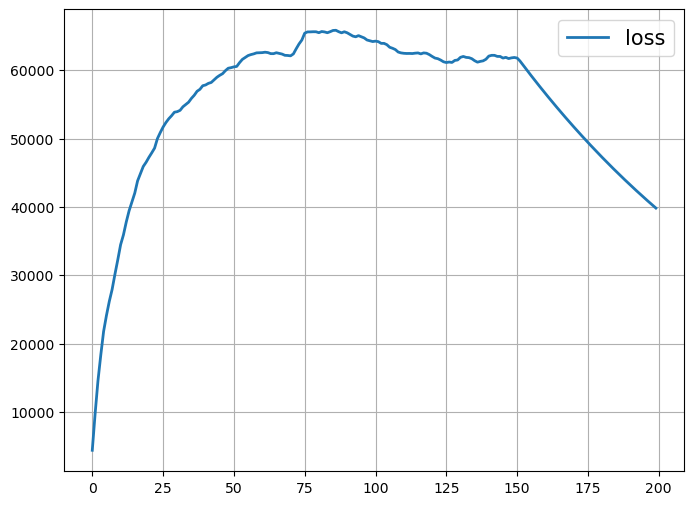

In [ ]:
plt.plot(svm.loss, linewidth=2, label='loss')
plt.grid()
plt.legend(prop={'size': 15})
plt.show()

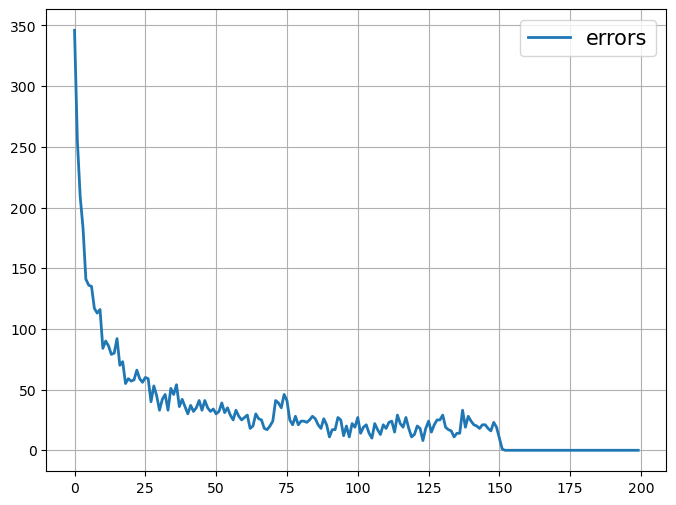

In [ ]:
plt.plot(svm.errors, linewidth=2, label='errors')
plt.grid()
plt.legend(prop={'size': 15})
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_pred = svm.predict(X_train)
# Расчет и вывод метрик
accuracy = accuracy_score(Y_train, Y_pred)
print("Accuracy:", accuracy)

precision = precision_score(Y_train, Y_pred)
print("Precision:", precision)

recall = recall_score(Y_train, Y_pred)
print("Recall:", recall)

f1 = f1_score(Y_train, Y_pred)
print("F1 score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [ ]:
Y_pred = svm.predict(X_test)
# Расчет и вывод метрик
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)

recall = recall_score(Y_test, Y_pred)
print("Recall:", recall)

f1 = f1_score(Y_test, Y_pred)
print("F1 score:", f1)

Accuracy: 0.7105263157894737
Precision: 0.821917808219178
Recall: 0.75
F1 score: 0.7843137254901962
